In [1]:
seed = 0

7)  Use the auto data set to predict whether a car gets high or low gas mileage

a) Create a binary variable that takes 1 for cars with gas mileage above the median, and 0 for cars below.

In [13]:
import os
import pandas as pd

direct = os.getcwd()
auto = pd.read_csv(os.path.join(direct, 'auto.csv'))

In [14]:
medianMPG = auto.describe()['mpg']['50%']

In [15]:
auto['mpg_class'] = auto['mpg'].apply(lambda x: 1 if x > medianMPG else 0)
auto.drop(columns=['mpg', 'name'], inplace=True)

auto2 = auto[auto['horsepower'] == '?']
auto.drop(auto2.index, inplace=True)

In [16]:
toPredict = auto['mpg_class']
params = auto.drop(columns = ['mpg_class'])

b) Fit a support vector classifier to the data with various values of cost, in order to predict whether a car gets high or low gas mileage.  Report the cross-validated errors associated with different values of this parameter.

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate as CV

data = []
for i in range(1, 15, 2):
    error = i/10.0
    classifier = SVC(C=error, kernel='linear', random_state = seed)
    scores = CV(classifier, params, toPredict, cv=10)
    linScore = linScore = sum(scores['test_score'] / len(scores['test_score']))
    data.append([error, linScore])

In [7]:
d = pd.DataFrame(data, columns=['error', 'MSE'])
d.plot(x='error', y='MSE');

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate as CV

classifier = SVC(C=0.5, kernel='linear', random_state = seed)
scores = CV(classifier, params, toPredict, cv=10)
linScore = sum(scores['test_score'] / len(scores['test_score']))
print(linScore)

0.8982051282051282


c) do the same with radial and poly kernels

In [13]:
from sklearn.model_selection import GridSearchCV as gscv

classifier = SVC(kernel='poly', random_state=0)

parameters = {'degree': [2, 3, 4, 5, 6], 'C':[0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]}
model = gscv(estimator = classifier, param_grid=parameters, n_jobs=-1, verbose=0, cv=5)
model.fit(params, toPredict)
model.best_params_

{'C': 1.4, 'degree': 4}

In [14]:
classifer = SVC(C=1.4, kernel='poly', random_state=seed, degree=4)
scores = CV(classifier, params, toPredict, cv=5)
polyScore = sum(scores['test_score'] / len(scores['test_score']))
print(polyScore)

0.8722817267121066


In [21]:
classifier = SVC(random_state=0)

parameters = {'C':[1, 1.2, 1.4, 1.6, 1.8], 'gamma':['auto', 'scale']}
model = gscv(estimator = classifier, param_grid=parameters, n_jobs=-1, verbose=0, cv=5)
model.fit(params, toPredict)
model.best_params_

{'C': 1.2, 'gamma': 'scale'}

In [22]:
classifier = SVC(C=1.2, random_state=seed, gamma='scale')
scores=CV(classifier, params, toPredict, cv=5)
radialScore = sum(scores['test_score'] / len(scores['test_score']))
print(radialScore)

0.8748458292762091


****Answer:**** The best performing was the linear, followed by radial, followed closely by polynomial

9a)  Create a training a set of 800 random samples

In [4]:
oj = pd.read_csv(os.path.join(direct, 'oj.csv'))

In [8]:
oj['Store7_io'] = oj['Store7'].apply(lambda x: 1 if x=='Yes' else 0)
oj['Purchase_CH'] = oj['Purchase'].apply(lambda x: 1 if x=='CH' else 0)
oj.drop(columns=['Store7', 'Purchase'], inplace=True)

In [10]:
train = oj.sample(n=800)
test = oj.drop(train.index)

b)  Fit a support vector classifier to the training data using C=0.01, purchase as the response, and the others as the predictors.  Describe the results.

In [31]:
y_train = train['Purchase_CH']
x_train = train.drop(columns=['Purchase_CH'])

y_test = test['Purchase_CH']
x_test = test.drop(columns=['Purchase_CH'])

In [39]:
classifier = SVC(C=0.01, kernel='linear', random_state = seed)
model = classifier.fit(x_train, y_train)

preds = model.predict(x_train)
predictions = pd.DataFrame(preds, columns=['Prediction'])
all = pd.concat((predictions, y_train), axis=1)
all['right'] = all.apply(lambda row: 1 if row['Prediction']==row['Purchase_CH'] else 0, axis=1)
trainAccuracy = all['right'].sum() / all.shape[0]

c) What are the training and test error rates?

In [40]:
test_preds = model.predict(x_test)
predictions = pd.DataFrame(test_preds, columns=['Prediction'])
all = pd.concat((predictions, y_test), axis=1)
all['right'] = all.apply(lambda row: 1 if row['Prediction']==row['Purchase_CH'] else 0, axis=1)
testAccuracy = all['right'].sum() / all.shape[0]

In [41]:
print('Train Accuracy:  {}\nTest Accuracy:  {}'.format(trainAccuracy, testAccuracy))

Train Accuracy:  0.76625
Test Accuracy:  0.737037037037037


d) Find the best cost using cross validation?
e) Compute the accuracy rates for training and testing rates using the new value of cost

In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate as CV

data = []
for i in [0.01, 0.1, 0.5, 1, 2, 3, 5, 7.5, 10]:
    classifier = SVC(C=i, kernel='linear', random_state = seed)
    scores = CV(classifier, params, toPredict, cv=10)
    linScore = linScore = sum(scores['test_score'] / len(scores['test_score']))
    data.append([i, linScore])

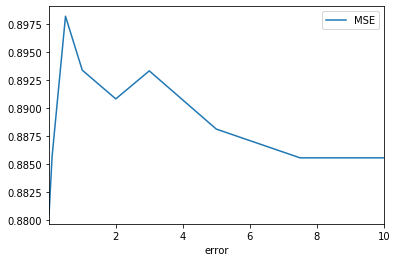

In [47]:
d = pd.DataFrame(data, columns=['error', 'MSE'])
d.plot(x='error', y='MSE');

****Answer:**** It looks like C=0.5 is the best

In [48]:
classifier = SVC(C=0.5, kernel='linear', random_state = seed)
model = classifier.fit(x_train, y_train)

preds = model.predict(x_train)
predictions = pd.DataFrame(preds, columns=['Prediction'])
all = pd.concat((predictions, y_train), axis=1)
all['right'] = all.apply(lambda row: 1 if row['Prediction']==row['Purchase_CH'] else 0, axis=1)
trainAccuracy = all['right'].sum() / all.shape[0]

test_preds = model.predict(x_test)
predictions = pd.DataFrame(test_preds, columns=['Prediction'])
all = pd.concat((predictions, y_test), axis=1)
all['right'] = all.apply(lambda row: 1 if row['Prediction']==row['Purchase_CH'] else 0, axis=1)
testAccuracy = all['right'].sum() / all.shape[0]

print('Train Accuracy:  {}\nTest Accuracy:  {}'.format(trainAccuracy, testAccuracy))

Train Accuracy:  0.83625
Test Accuracy:  0.8407407407407408


g) Try with polynomial kernel and degree = 2

In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate as CV

data = []
for i in [0.01, 0.1, 0.5, 1, 2, 3, 5, 7.5, 10, 12, 14, 16, 18]:
    classifier = SVC(C=i, kernel='poly', degree=2, random_state = seed)
    scores = CV(classifier, params, toPredict, cv=10)
    linScore = linScore = sum(scores['test_score'] / len(scores['test_score']))
    data.append([i, linScore])

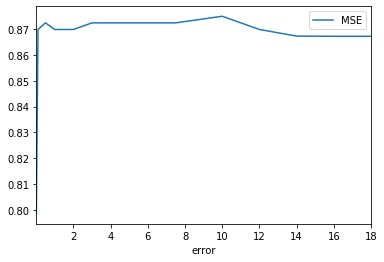

In [54]:
d = pd.DataFrame(data, columns=['error', 'MSE'])
d.plot(x='error', y='MSE');

In [55]:
classifier = SVC(C=10, kernel='poly', degree=2, random_state = seed)
model = classifier.fit(x_train, y_train)

preds = model.predict(x_train)
predictions = pd.DataFrame(preds, columns=['Prediction'])
all = pd.concat((predictions, y_train), axis=1)
all['right'] = all.apply(lambda row: 1 if row['Prediction']==row['Purchase_CH'] else 0, axis=1)
trainAccuracy = all['right'].sum() / all.shape[0]

test_preds = model.predict(x_test)
predictions = pd.DataFrame(test_preds, columns=['Prediction'])
all = pd.concat((predictions, y_test), axis=1)
all['right'] = all.apply(lambda row: 1 if row['Prediction']==row['Purchase_CH'] else 0, axis=1)
testAccuracy = all['right'].sum() / all.shape[0]

print('Train Accuracy:  {}\nTest Accuracy:  {}'.format(trainAccuracy, testAccuracy))

Train Accuracy:  0.615
Test Accuracy:  0.5962962962962963
